<a href="https://colab.research.google.com/github/jpineda714/CIENCIA_DATOS_2025/blob/main/Tarea_dataset_Johan_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install wquantiles


In [2]:
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
# Subir archivo CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer archivo CSV
df  = pd.read_csv(filename)

Saving insurance.csv to insurance.csv


In [5]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:

df.tail(12)

,age,sex,bmi,children,smoker,region,charges
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


#overview

In [7]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
print(f"media {df['age'].mean()}")


print(f"mediana {df['age'].median()}")

media 39.20702541106129
mediana 39.0


In [11]:
trim_mean(df['bmi'],0.1)

np.float64(30.50021455223881)

In [12]:
df['bmi'].mean()

np.float64(30.66339686098655)

In [13]:
np.average(df['age'],weights=df['bmi'])

np.float64(39.51212335590959)

In [14]:
wquantiles.median(df['age'],weights=df['bmi'])

np.float64(40.0)

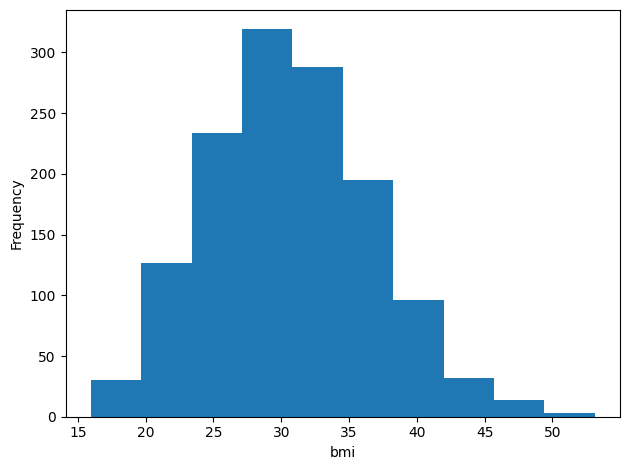

In [15]:
ax= df['bmi'].plot.hist()
ax.set_xlabel('bmi')
plt.tight_layout()
plt.show()

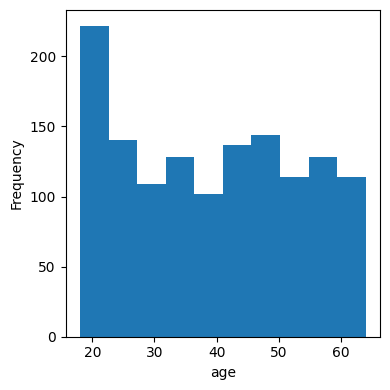

In [16]:
ax=(df['age']).plot.hist(figsize=(4,4))
ax.set_xlabel('age')
plt.tight_layout()
plt.show()

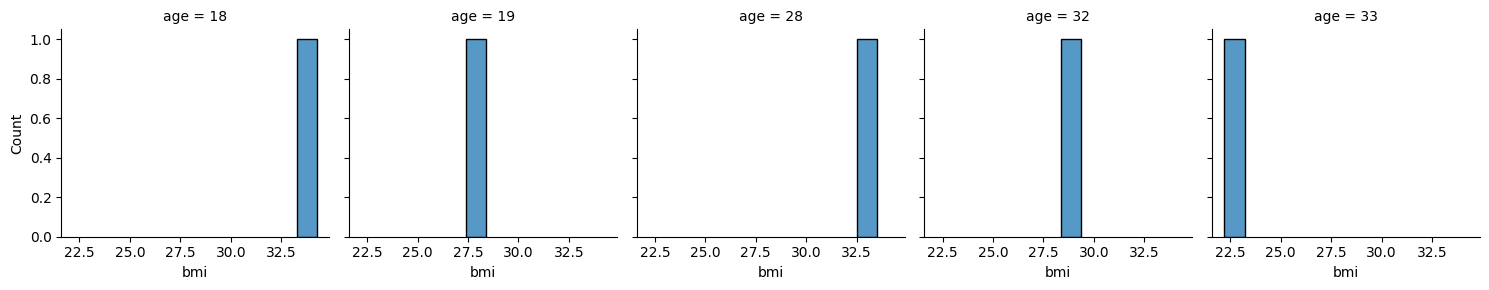

In [17]:
analisis=df.head()
g=sns.FacetGrid(analisis,col="age")
g.map(sns.histplot,'bmi')